In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
    # Read data into DataFrame from CSV file
    # cyclone_df = pd.read_csv("Cyclone_ML.csv")
    cyclone_df = pd.read_csv("../data/Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["WIND_COMPASS"]
    # y = cyclone_df["MAX_REP_WIND_DIR"]
 

    print(X.shape, y.shape)

(1691, 7) (1691,)


In [4]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI)
0,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005
1,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454
2,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259
3,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169
4,1.0,20.0,-11.20,95.00,1002.0,12.9,1.950454
...,...,...,...,...,...,...,...
1686,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407
1687,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897
1688,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605
1689,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106


In [5]:
y

0        E
1        E
2        S
3       SW
4        W
        ..
1686     W
1687     N
1688    SW
1689    SW
1690    SW
Name: WIND_COMPASS, Length: 1691, dtype: object

In [6]:
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.998/0.317
k: 3, Train/Test Score: 0.575/0.284
k: 5, Train/Test Score: 0.502/0.267
k: 7, Train/Test Score: 0.449/0.272
k: 9, Train/Test Score: 0.409/0.262
k: 11, Train/Test Score: 0.402/0.253
k: 13, Train/Test Score: 0.381/0.255
k: 15, Train/Test Score: 0.357/0.246
k: 17, Train/Test Score: 0.342/0.236
k: 19, Train/Test Score: 0.334/0.236


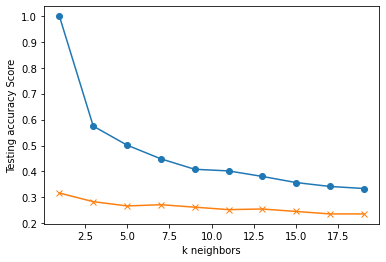

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Train Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Train Acc: 0.402
k=11 Test Acc: 0.253


In [17]:
    preds = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f'Model accuracy on test set: {acc:.2f}')
    preds

Model accuracy on test set: 0.25


array(['NE', 'SE', 'SE', 'W', 'W', 'E', 'E', 'SE', 'N', 'S', 'NW', 'SE',
       'SW', 'E', 'S', 'E', 'SW', 'NW', 'N', 'SE', 'W', 'SE', 'S', 'W',
       'SW', 'E', 'W', 'S', 'E', 'SE', 'W', 'E', 'E', 'E', 'SW', 'S', 'E',
       'NE', 'E', 'S', 'N', 'N', 'NE', 'SE', 'NW', 'E', 'N', 'E', 'E',
       'NW', 'S', 'W', 'N', 'SE', 'N', 'E', 'SE', 'N', 'S', 'W', 'W', 'S',
       'NW', 'SE', 'W', 'E', 'W', 'E', 'E', 'NE', 'E', 'SE', 'S', 'W',
       'E', 'N', 'N', 'SW', 'S', 'SE', 'E', 'E', 'S', 'SW', 'NW', 'E',
       'SE', 'N', 'NE', 'NW', 'S', 'SE', 'SE', 'SE', 'E', 'S', 'W', 'W',
       'SE', 'E', 'N', 'E', 'E', 'SE', 'SE', 'E', 'NW', 'NW', 'W', 'W',
       'S', 'N', 'NE', 'SE', 'NW', 'W', 'E', 'E', 'E', 'NW', 'E', 'S',
       'S', 'N', 'E', 'SE', 'NE', 'NW', 'SE', 'NW', 'E', 'E', 'S', 'E',
       'S', 'N', 'NW', 'SE', 'N', 'SE', 'E', 'E', 'E', 'W', 'SE', 'E',
       'SE', 'E', 'W', 'W', 'N', 'E', 'E', 'E', 'SE', 'E', 'S', 'NE',
       'NE', 'NE', 'SE', 'W', 'E', 'E', 'SE', 'NW', 'NW', 'NE',

In [19]:
joblib.dump(knn, 'cyclone_kNN.smd')
print("Model is saved.")

Model is saved.
